In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:22<00:00, 129MB/s]
100% 1.98G/1.98G [00:22<00:00, 94.6MB/s]


In [ ]:
! unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

Displaying 6 images separately from Train Apple:


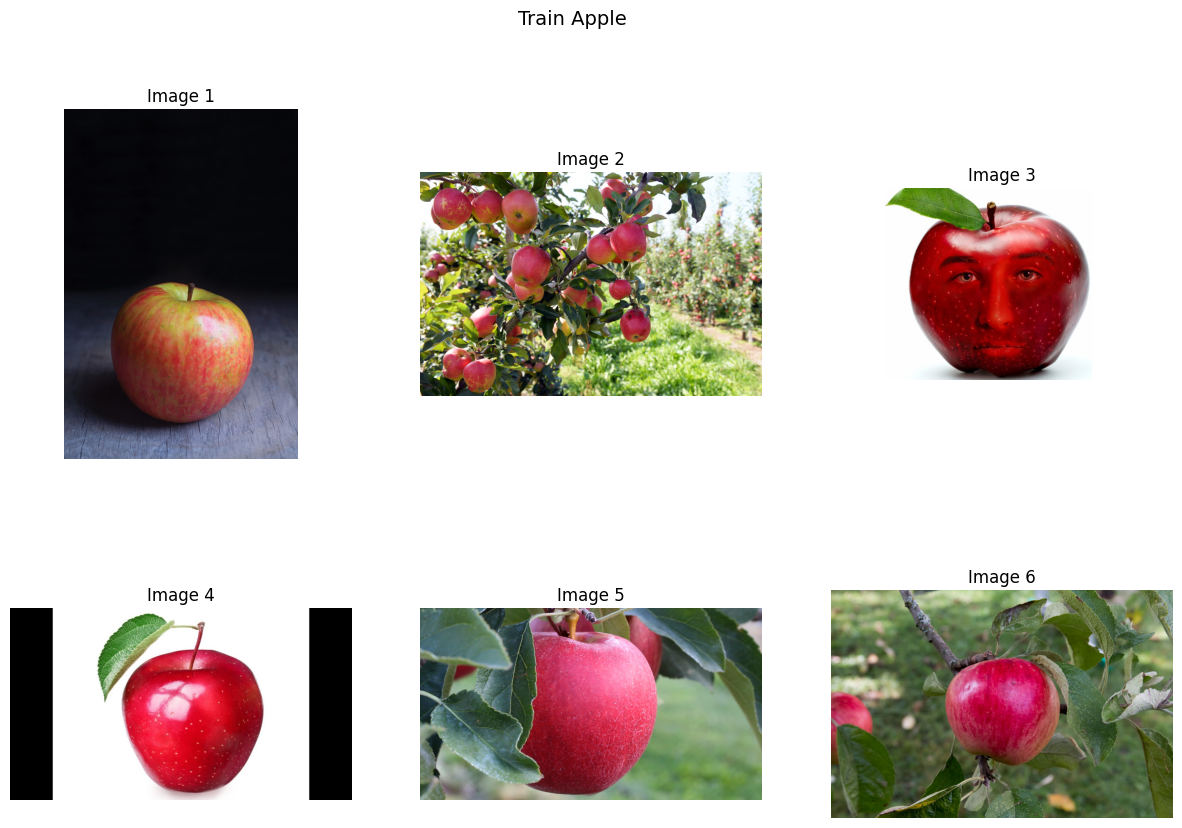

Displaying 6 images separately from Train Corn:


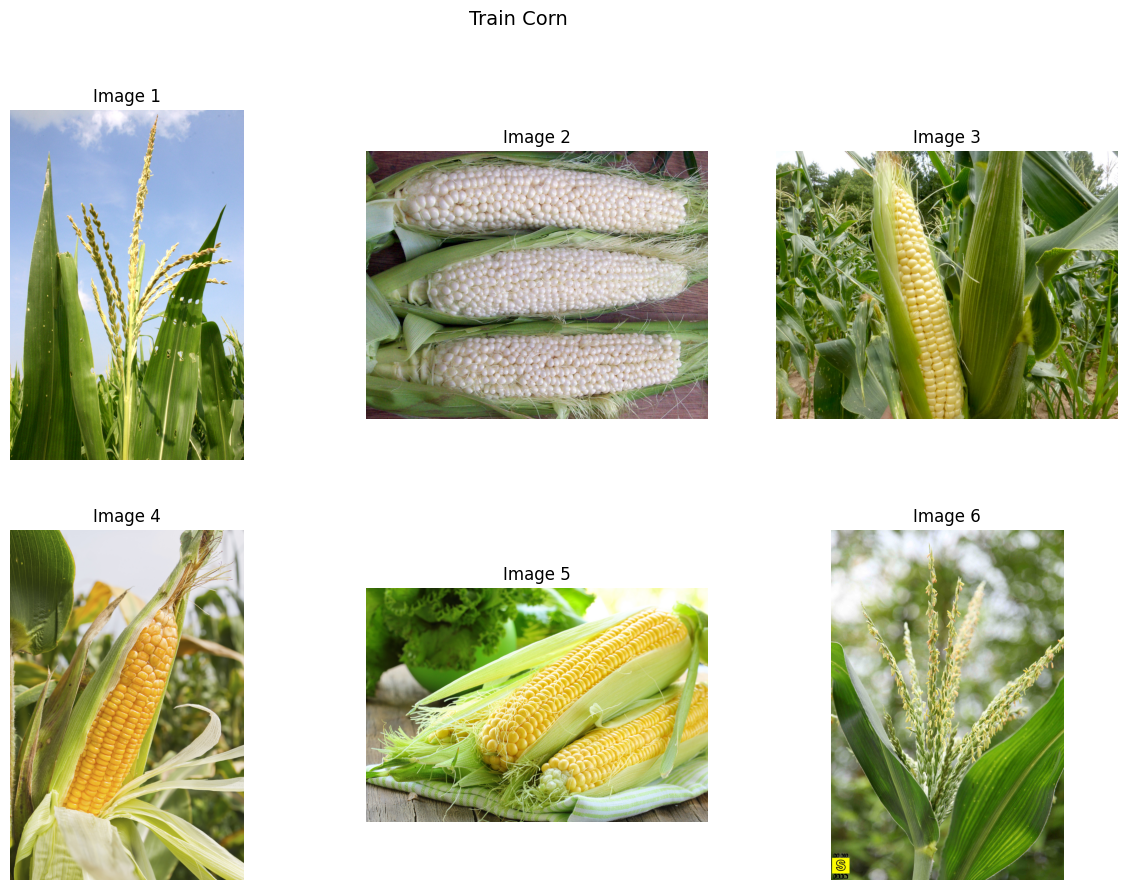

Displaying 6 images separately from Test Apple:


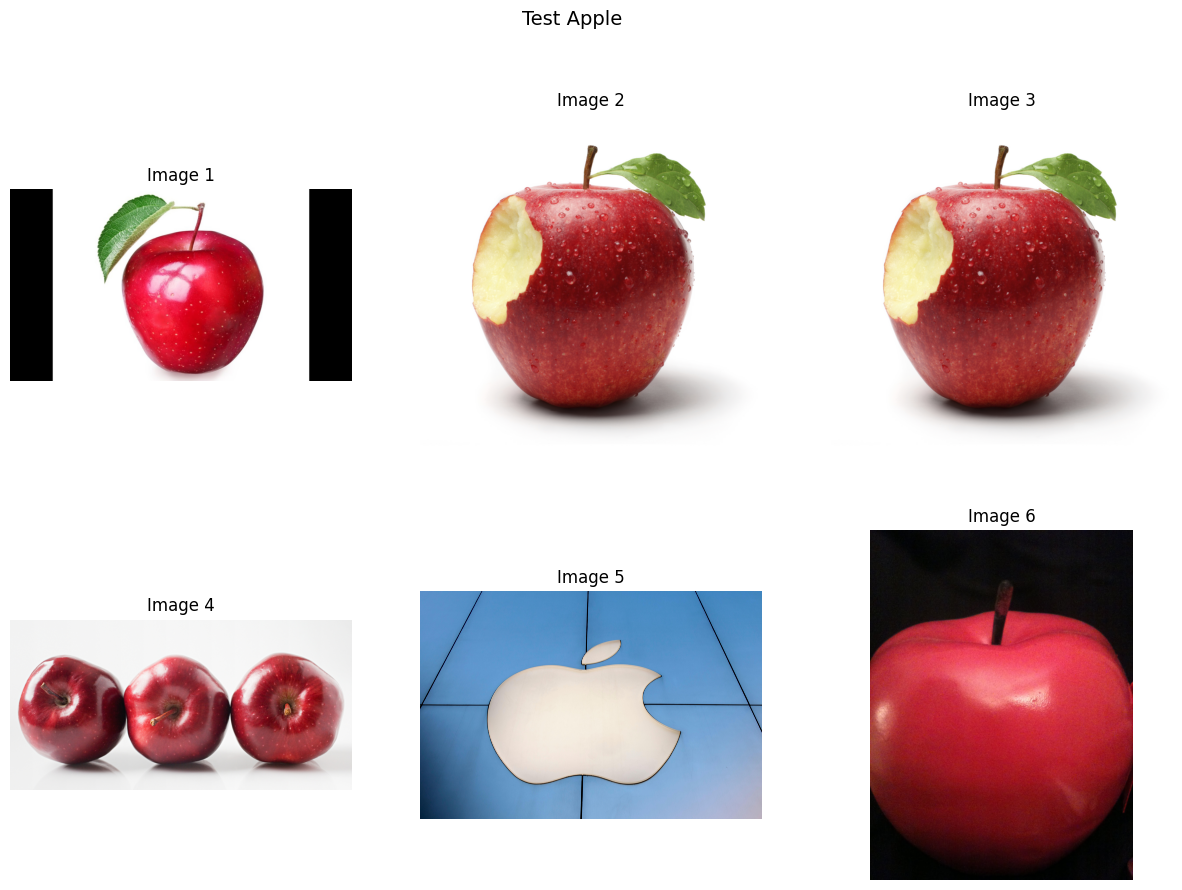

Displaying 6 images separately from Test Corn:


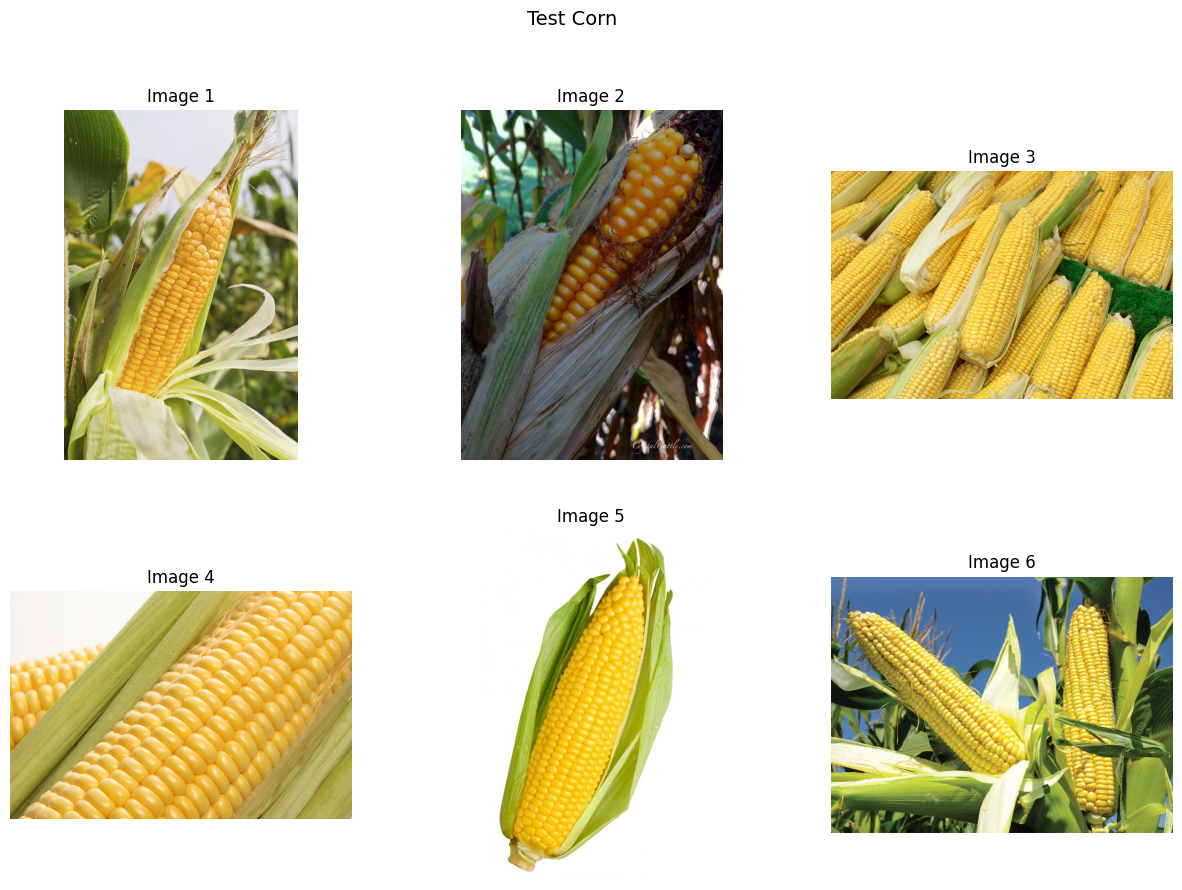

Displaying 6 images separately from Validation Apple:


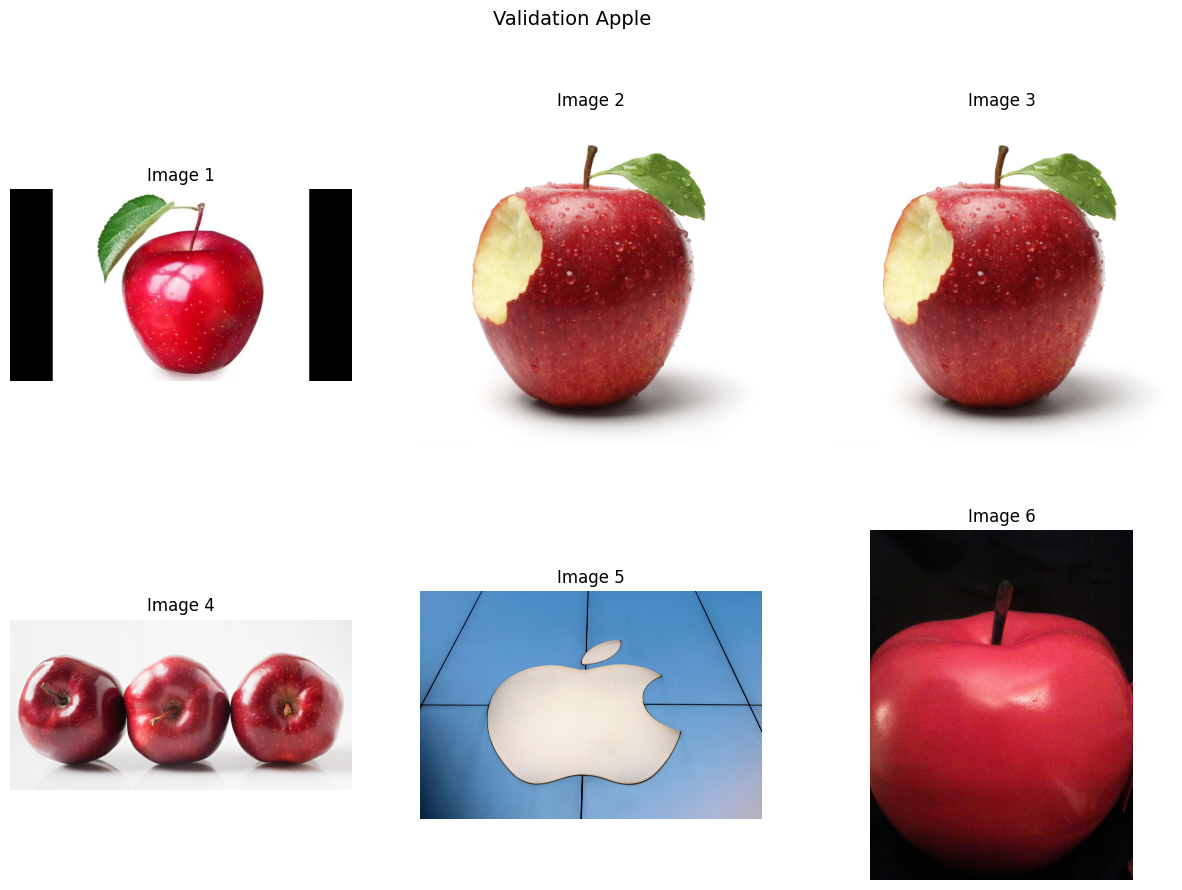

Displaying 6 images separately from Validation Corn:


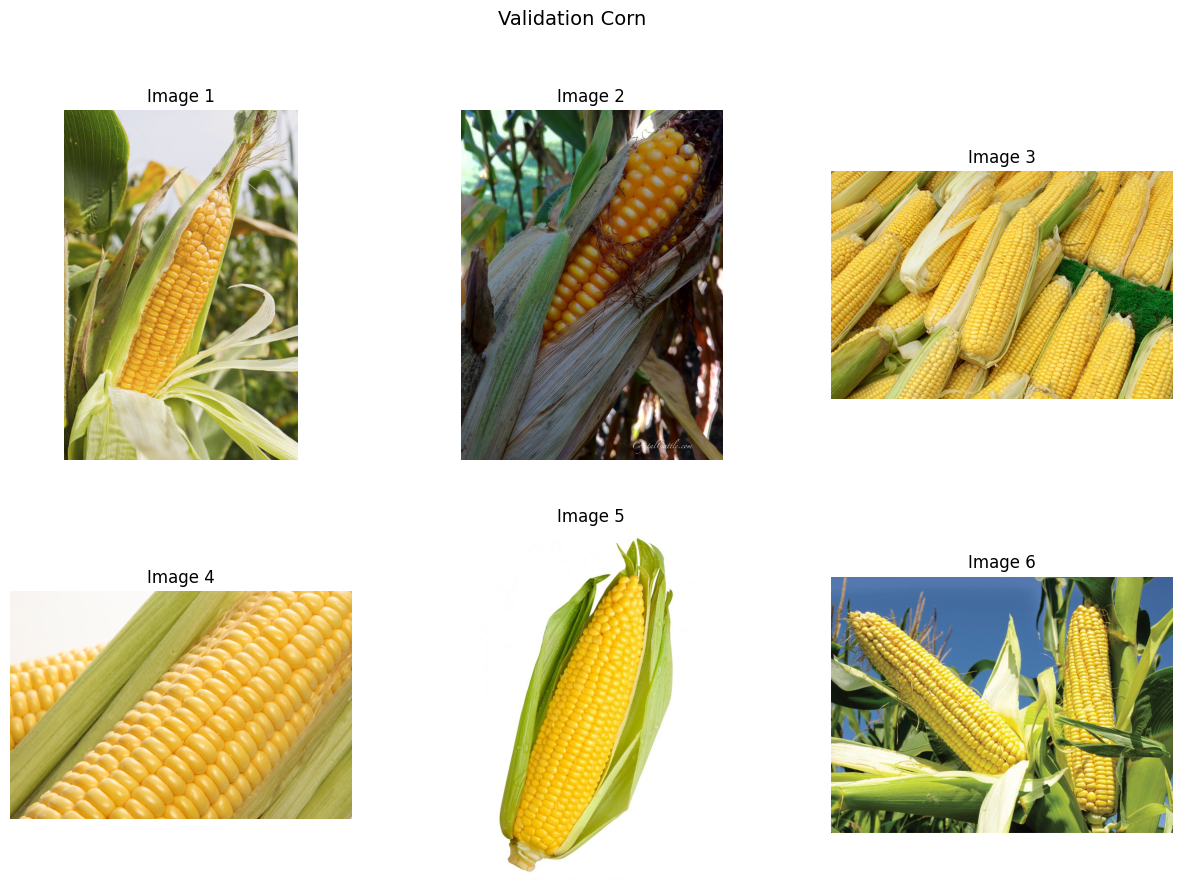

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to plot 6 images separately from a folder
def plot_images_separately_from_folder(folder_path, title):
    images = os.listdir(folder_path)[:6]  # List of first 6 images in the folder

    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=14)
    for i, image_name in enumerate(images):
        img = mpimg.imread(os.path.join(folder_path, image_name))
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i+1}")

    plt.show()

# Paths to different folders
paths = [
    ('Train Apple', '/content/train/apple'),
    ('Train Corn', '/content/train/corn'),
    ('Test Apple', '/content/test/apple'),
    ('Test Corn', '/content/test/corn'),
    ('Validation Apple', '/content/validation/apple'),
    ('Validation Corn', '/content/validation/corn')
]

# Plot 6 images separately from each folder
for title, path in paths:
    print(f"Displaying 6 images separately from {title}:")
    plot_images_separately_from_folder(path, title)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 72s 620ms/step - loss: 8.8646 - accuracy: 0.0308 - val_loss: 3.5819 - val_accuracy: 0.0342
Epoch 2/32
98/98 [==============================] - 64s 614ms/step - loss: 3.5816 - accuracy: 0.0350 - val_loss: 3.5795 - val_accuracy: 0.0342
Epoch 3/32
98/98 [==============================] - 65s 616ms/step - loss: 3.5759 - accuracy: 0.0308 - val_loss: 3.5653 - val_accuracy: 0.0342
Epoch 4/32
98/98 [==============================] - 66s 623ms/step - loss: 3.5582 - accuracy: 0.0446 - val_loss: 3.5304 - val_accuracy: 0.0541
Epoch 5/32
98/98 [==============================] - 67s 640ms/step - loss: 3.5287 - accuracy: 0.0472 - val_loss: 3.4915 - val_accuracy: 0.0798
Epoch 6/32
98/98 [==============================] - 67s 638ms/step - loss: 3.5009 - accuracy: 0.0607 - val_loss: 3.4545 - val_accuracy: 0.1140
Epoch 7/32
98/98 [==============================] - 64s 615ms/step - loss: 3.4374 - accuracy: 0.0687 - val_loss: 3.4669 - val_accuracy: 0.0769

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 57s 534ms/step - loss: 0.1521 - accuracy: 0.9612
Training accuracy: 0.9611557126045227


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 8s 305ms/step - loss: 0.3893 - accuracy: 0.9316
Validation accuracy: 0.9316239356994629


## Saving Model

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cnn.save('fruits_and_vegetables_recognition_model.h5')

In [ ]:
cnn.save('/content/drive/MyDrive/Models/fruits_and_vegetables_recognition_model', save_format="h5")

In [ ]:
training_history.history

{'loss': [8.864638328552246,
  3.581571340560913,
  3.575852632522583,
  3.5581541061401367,
  3.528740167617798,
  3.500936508178711,
  3.4374022483825684,
  3.4323954582214355,
  3.3089053630828857,
  3.231153726577759,
  3.0875186920166016,
  2.9621999263763428,
  2.791233777999878,
  2.6749141216278076,
  2.530388355255127,
  2.3029119968414307,
  2.1113545894622803,
  1.9094594717025757,
  1.667141079902649,
  1.4704972505569458,
  1.2855706214904785,
  1.215732216835022,
  1.088144302368164,
  0.9060747623443604,
  0.8112615346908569,
  0.7578568458557129,
  0.6958296895027161,
  0.6189282536506653,
  0.5876465439796448,
  0.5605606436729431,
  0.525876522064209,
  0.4705374836921692],
 'accuracy': [0.030818618834018707,
  0.034991975873708725,
  0.030818618834018707,
  0.044622793793678284,
  0.047191012650728226,
  0.06067415699362755,
  0.06869983673095703,
  0.07640449702739716,
  0.10786516964435577,
  0.12327447533607483,
  0.15024076402187347,
  0.19325841963291168,
  0.23

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


Training Visualization

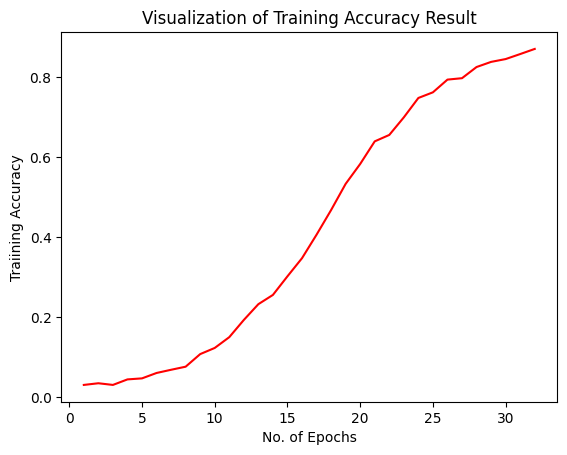

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

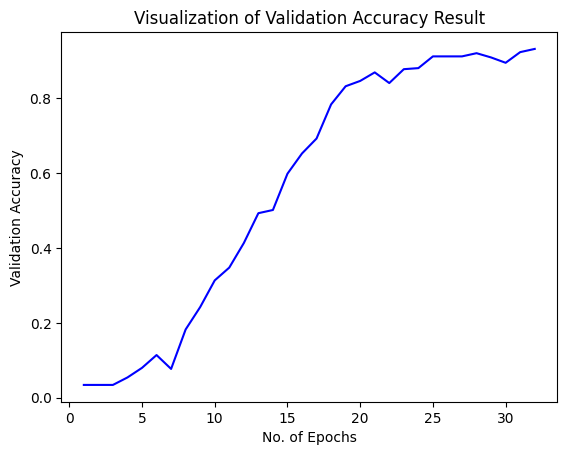

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

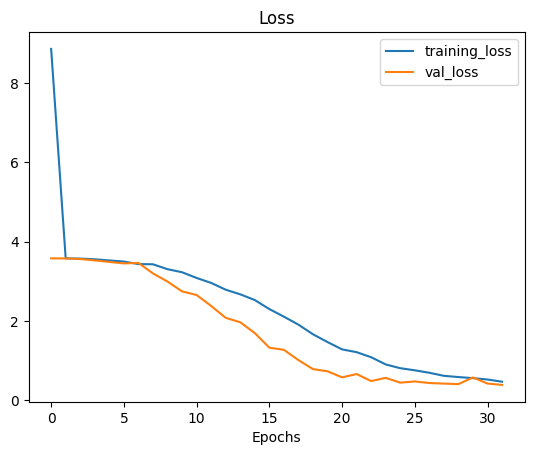

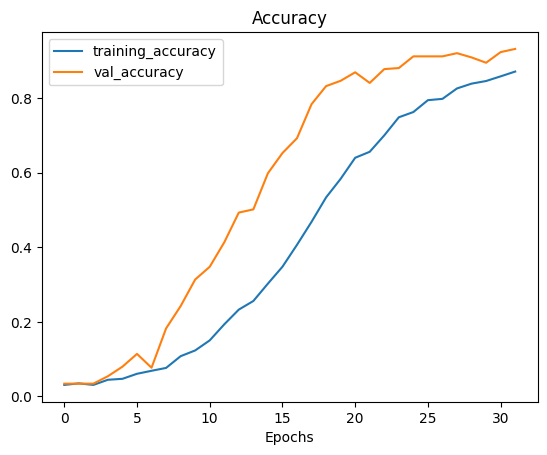

In [ ]:
# Plotting both training and validation datasets
plot_loss_curves(training_history)

Prediction

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
import numpy as np
# Function to load and preprocess an image from Google Drive
def load_and_prep_image_from_drive(image_path):
    """
    Loads and preprocesses an image from Google Drive.
    """
    # Load the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))

    # Convert image to array and normalize
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image

    return img_array

def pred_and_plot_from_drive(model, image_path):
    """
    Imports an image from Google Drive, makes a prediction on it with
    a trained model, and plots the image with the predicted class as the title.
    """
    # Load and preprocess the image from Google Drive
    img = load_and_prep_image_from_drive(image_path)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    result_index = np.argmax(pred)

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {test_set.class_names[result_index]}")
    plt.axis(False)
    plt.show()


In [ ]:
import urllib
from PIL import Image
def load_and_prep_image_from_url(image_url):
    """
    Loads and preprocesses an image from a URL.
    """
    # Load the image from the URL
    response = urllib.request.urlopen(image_url)
    img = Image.open(response)

    # Resize and preprocess the image
    img = img.resize((64, 64))  # Resize to match the input shape expected by the model
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image

    return img_array

def pred_and_plot_from_url(model, image_url):
    """
    Imports an image from a URL, makes a prediction on it with
    a trained model, and plots the image with the predicted class as the title.
    """
    # Load and preprocess the image from the URL
    img = load_and_prep_image_from_url(image_url)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    result_index = np.argmax(pred)

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {test_set.class_names[result_index]}")
    plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 333ms/step
[[0.03094754 0.00532221 0.00792025 0.00656763 0.01619842 0.0083756
  0.03546217 0.01951834 0.00865243 0.00522165 0.00847348 0.01521868
  0.26669684 0.02296376 0.01370426 0.00943489 0.00498529 0.00250962
  0.00451239 0.0016693  0.2168512  0.00310574 0.00574154 0.01807364
  0.00255474 0.04659943 0.01586246 0.01312962 0.03424557 0.01664111
  0.00143073 0.01083044 0.02057518 0.01603771 0.06857454 0.01539164]]


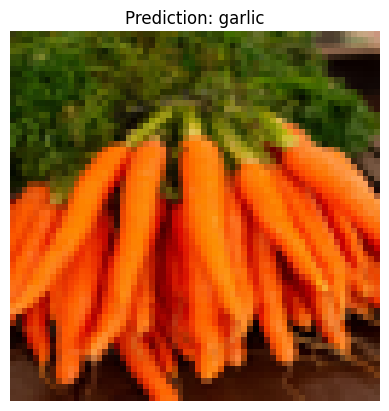

In [ ]:
img_url = 'https://images.unsplash.com/photo-1598170845058-32b9d6a5da37?q=80&w=1000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Y2Fycm90fGVufDB8fDB8fHww'
pred_and_plot_from_url(cnn, img_url)

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.load_model('/content/fruits_and_vegetables_recognition_model.h5')

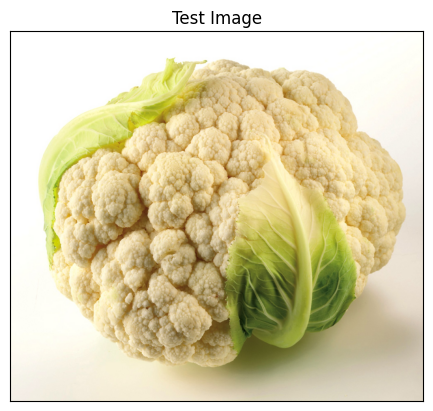

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/cauliflower/Image_10.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 [==============================] - 0s 19ms/step
7


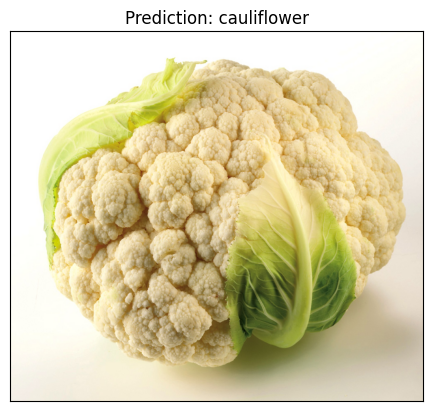

In [ ]:
# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

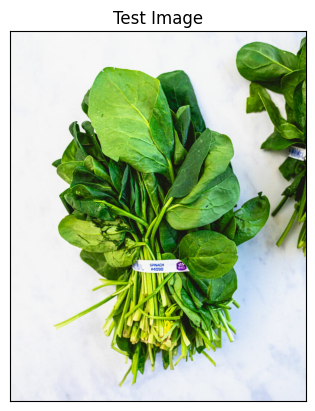

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/spinach/Image_7.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 [==============================] - 0s 17ms/step
30


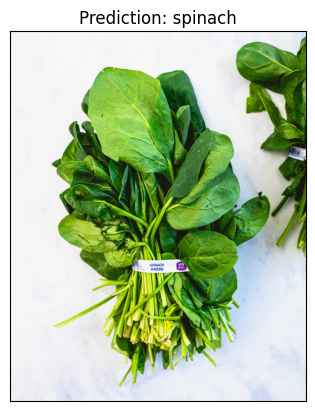

In [ ]:
# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
cnn.save('fruits_and_vegetables_recognition_final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
cnn.save('/content/drive/MyDrive/Models/fruits_and_vegetables_recognition_final_model', save_format="h5")

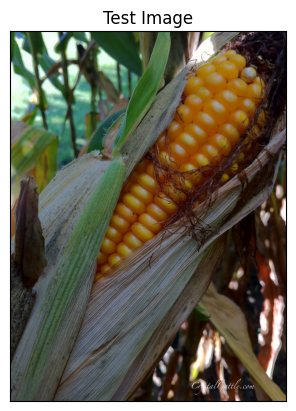

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/corn/Image_10.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 [==============================] - 0s 18ms/step
9


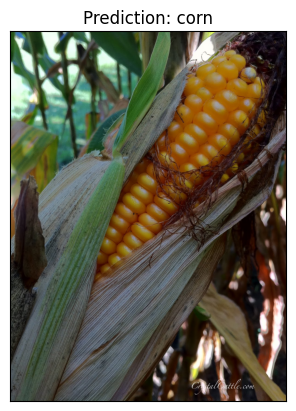

In [ ]:
# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

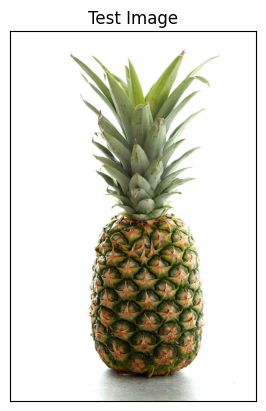

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/pineapple/Image_9.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 [==============================] - 0s 18ms/step
25


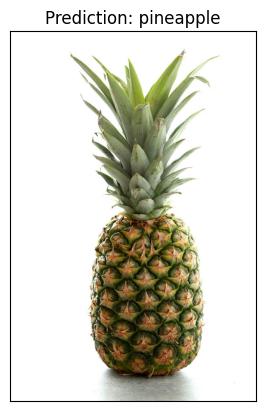

In [ ]:
# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()

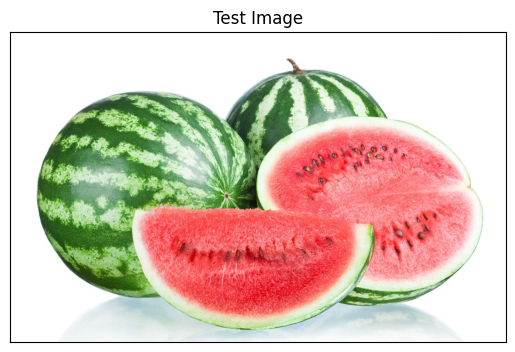

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/test/watermelon/Image_8.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1/1 [==============================] - 0s 17ms/step
35


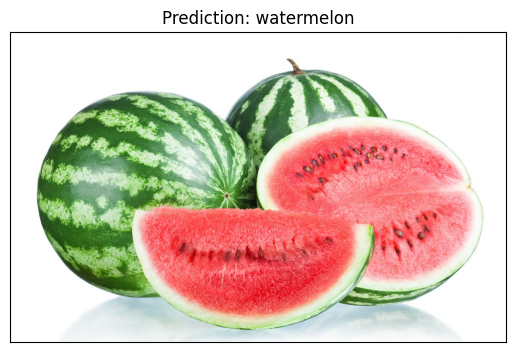

In [ ]:
# Displaying the image and predicting
plt.imshow(img)
plt.title(f"Prediction: {test_set.class_names[result_index]}")
plt.xticks([])
plt.yticks([])
plt.show()